### Objective of the Notebook

In this notebook we are going to explore the bigmart dataset and try to analyse some hypothesis using Visualization and statistical methods.

This notebook is divided into 4 segments:

1. Problem Statement and Hypothesis Generation.
2. Analysis of Data types and statistical variations.
3. Univariate Analysis.
4. Bivariate Analysis.

### Problem Statement
Understanding the problem statement is the first and foremost step. This would help us give an intuition of what we will face ahead of time. Let us see the problem statement -

<b>The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products. Same is the case with each store.</b>

<b>The aim is to build a predictive model to find out the sales of each product at a particular store so that it would help the decision makers at BigMart to find out the properties of any product or store, which play a key role in increasing the overall sales.</b>

To achive this, firstly we need to explore the dataset and get familiar with it. Let’s begin exploring the dataset and try to find interesting patterns.

In [2]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings   # To ignore any warnings 
warnings.filterwarnings("ignore")

We have the bigmart.csv file which contains 11 independent variables and 1 target variable, i.e., Item_Outlet_Sales.

In [6]:
data = pd.read_csv('bigmart.csv')

Initially we should understand our raw data thoroughly, i.e., we should explore the no. of features/columns and rows, datatype of the features, feature names and so on. It helps in working with the data in the next stages.

#### Dimensions of Data
Let’s quicky check the dimensions of our data, i.e., columns and rows.

In [8]:
data.shape

(8523, 12)

#### Features of Data
We will take a quick glance over the feature names of train and test datasets.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


As we can see, there are 4 numeric and 7 categorical variables.

#### Why do we need Exploratory Data Analysis (EDA)?
After understanding the dimensions and properties of data, we have to deep dive and explore the data visually. It helps us in understanding the nature of data in terms of distribution of the individual variables/features, finding missing values, relationship with other variables and many other things.

We need to predict Item_Outlet_Sales for given data. Let's explore this feature.

In [10]:
data['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

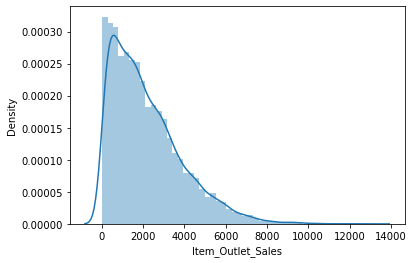

In [11]:
sns.distplot(data['Item_Outlet_Sales'])

In [12]:
print('Skewness: %f' % data['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %data['Item_Outlet_Sales'].kurt())

Skewness: 1.177531
Kurtsis: 1.615877


After analyzing the above graph we can conclude that:
1. Deviate from the normal distribution.
2. Have appreciable positive skewness.
3. Show peakedness.

In [14]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [15]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [16]:
data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

### Univariate Analysis

Let’s start with univariate EDA. It involves exploring variables individually. We will try to visualize the continuous variables using histograms and categorical variables using bar plots.


#### Target Variable
Firstly let's visualize out target variable. Since our target variable is continuous, we can visualise it by plotting its histogram.

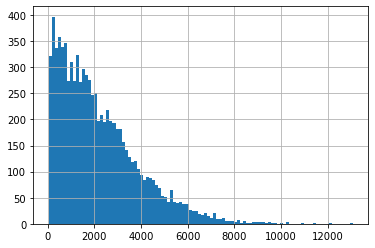

In [17]:
data['Item_Outlet_Sales'].hist(bins = 100);

As you can see, it is a right skewd variable and would need some data transformation to treat its skewness.

#### Independent Variables (numeric variables)
Now let’s check the numeric independent variables. We’ll again use the histograms for visualizations because that will help us in visualizing the distribution of the variables.


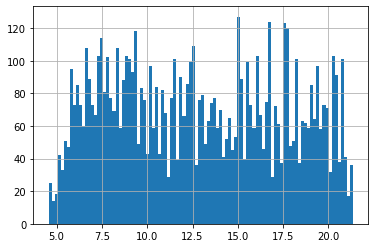

In [19]:
data['Item_Weight'].hist(bins = 100);

<AxesSubplot:>

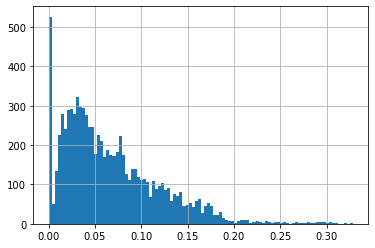

In [20]:
data['Item_Visibility'].hist(bins = 100)

<AxesSubplot:>

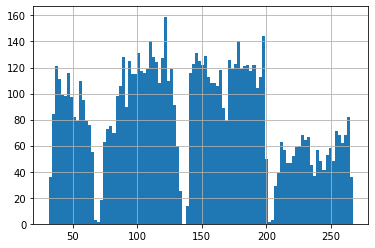

In [21]:
data['Item_MRP'].hist(bins = 100)

#### Observations
1. There seems to be no clear-cut pattern in Item_Weight. 
2. Item_Visibility is right-skewed and should be transformed to curb its skewness. 
3. We can clearly see 4 different distributions for Item_MRP. It is an interesting insight.

#### Independent Variables (categorical variables)
Now we’ll try to explore and gain some insights from the categorical variables. A categorical variable or feature can have only a finite set of values. Let’s first plot Item_Fat_Content.

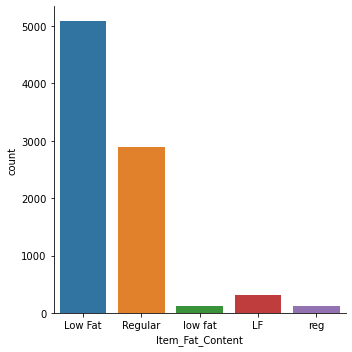

In [22]:
import seaborn as sns
sns.catplot(x="Item_Fat_Content", kind="count", data=data);

In the figure above, ‘LF’, ‘low fat’, and ‘Low Fat’ are the same category and can be combined into one. Similarly we can be done for ‘reg’ and ‘Regular’ into one. After making these corrections we’ll plot the same figure again.

In [23]:
data['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace = True)

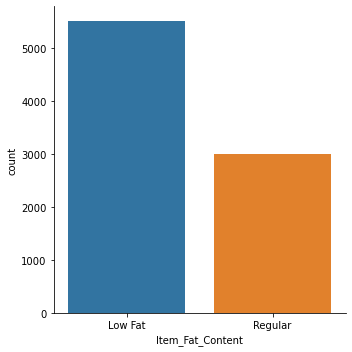

In [25]:
sns.catplot('Item_Fat_Content',kind = 'count',data=data)

#### Now lets check other categorical variables

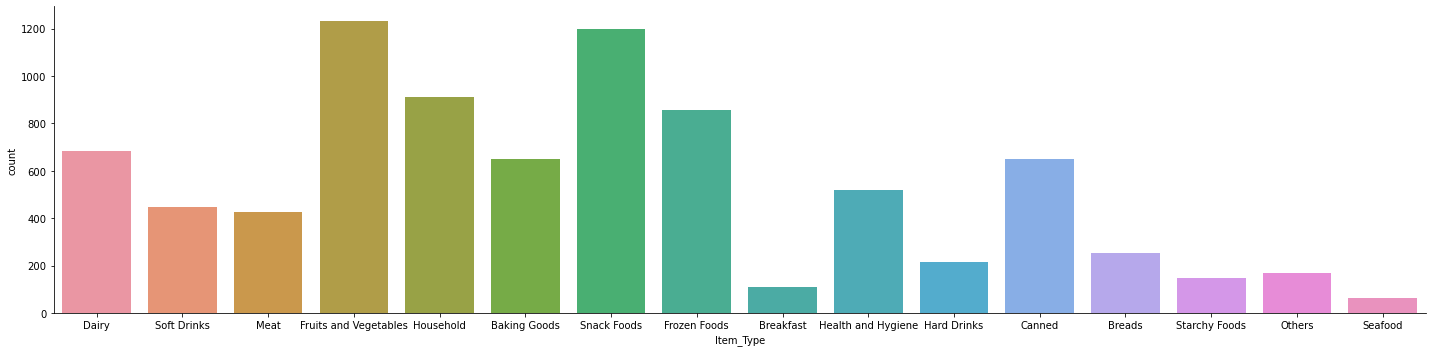

In [26]:
sns.catplot('Item_Type',kind = 'count',data = data, aspect =4)

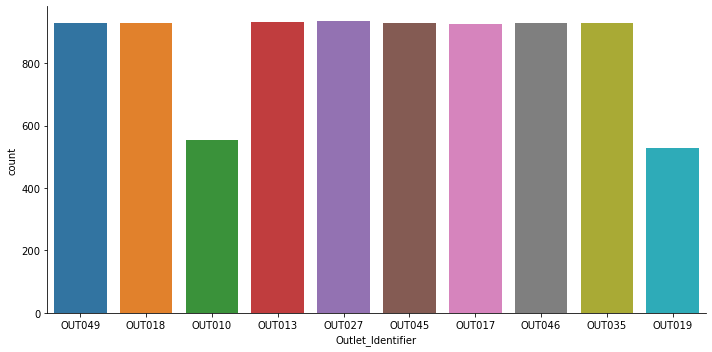

In [27]:
sns.catplot('Outlet_Identifier',kind = 'count',data = data, aspect = 2)

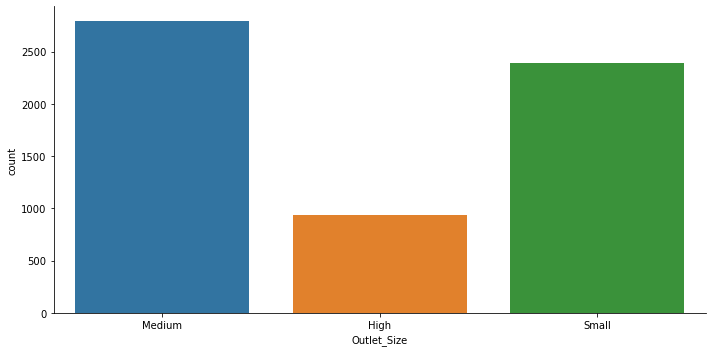

In [28]:
sns.catplot('Outlet_Size',kind = 'count',data = data, aspect = 2)

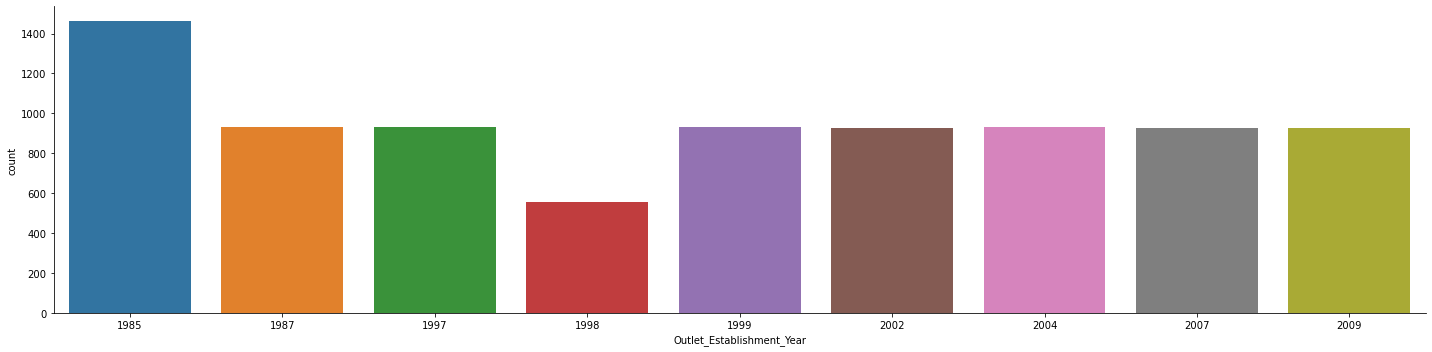

In [29]:
sns.catplot('Outlet_Establishment_Year',kind = 'count',data = data, aspect =4)

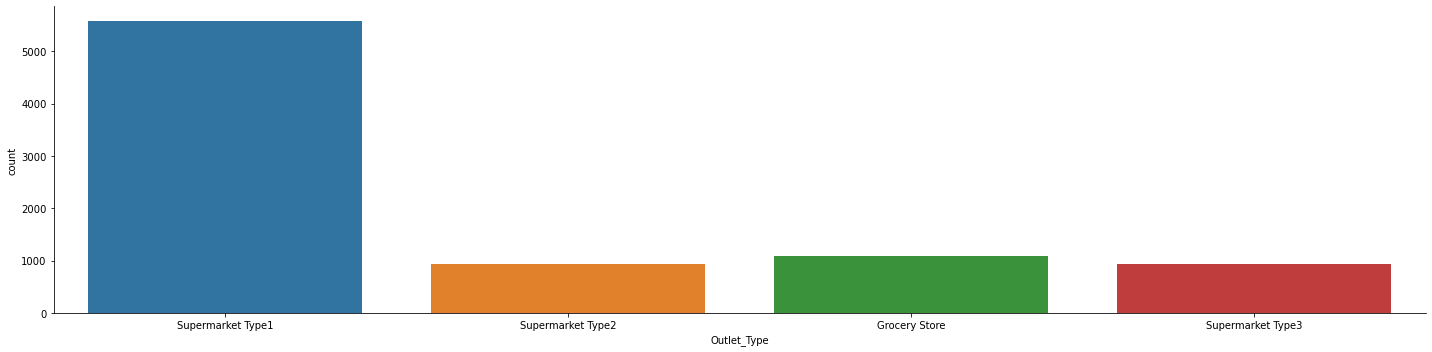

In [30]:
sns.catplot('Outlet_Type',kind = 'count',data = data, aspect =4)

#### Observations
1. Lesser number of observations in the data for the outlets established in the year 1998 as compared to the other years.
2. Supermarket Type 1 seems to be the most popular category of Outlet_Type.
3. Most of the outlet types are of medium size.
4. Outlet 10 and 19 have lesser number of data points than other outlets.
5. Largest number of sales is in Fruits and Vegetables category and the lowest number is in seafood.

#### Bivariate Analysis
After looking at every feature individually, let’s now do some bivariate analysis. Here we’ll explore the independent variables with respect to the target variable. The objective is to discover hidden relationships between the independent variable and the target variable and use those findings in missing data imputation and feature engineering in the next module.

We will make use of scatter plots for the continuous or numeric variables and violin plots for the categorical variables.

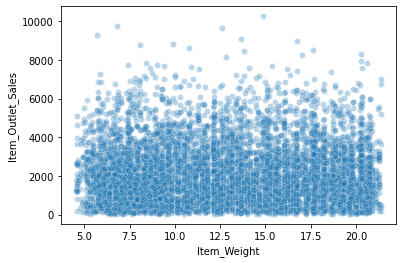

In [31]:
sns.scatterplot(x = 'Item_Weight',y = 'Item_Outlet_Sales',data = data,alpha = 0.3);

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>

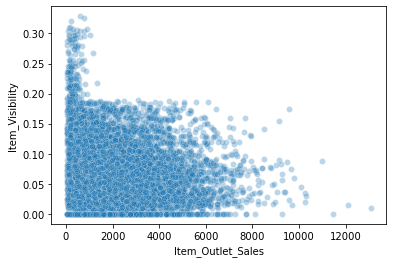

In [32]:
sns.scatterplot(x = 'Item_Outlet_Sales',y = 'Item_Visibility',data = data,alpha = 0.3)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

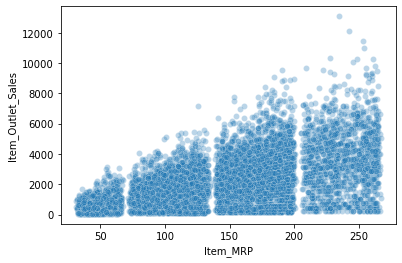

In [33]:
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = data,alpha = 0.3)

#### Observations

1. Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern. 
2. In Item_Visibility vs Item_Outlet_Sales, there is a string of points at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero. We will take note of this issue and deal with it in the later stages. 
3. In the third plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.

Now we’ll visualise the categorical variables with respect to Item_Outlet_Sales. We will try to check the distribution of the target variable across all the categories of each of the categorical variable.

We could have used boxplots here, but instead we’ll use the **violin plots** as they show the full distribution of the data. The width of a violin plot at a particular level indicates the concentration or density of data at that level. The height of a violin tells us about the range of the target variable values.

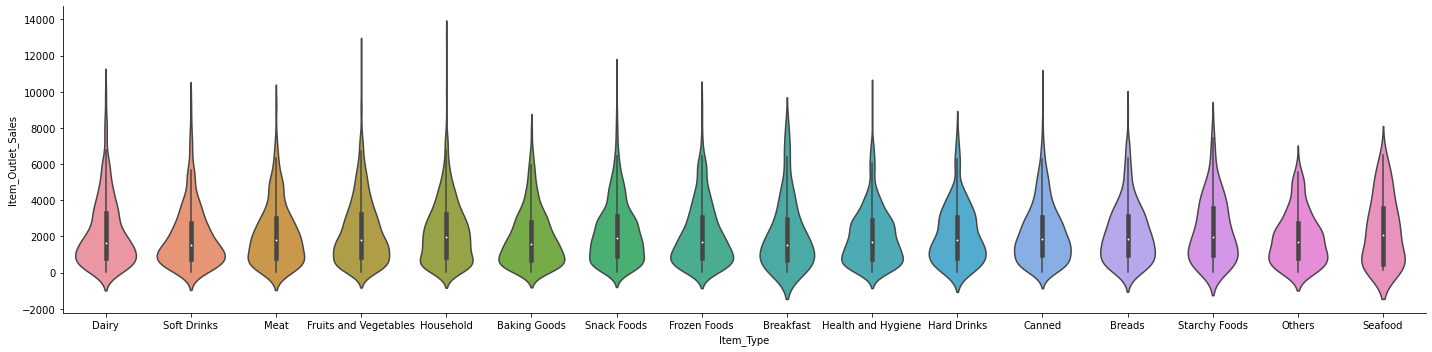

In [34]:
sns.catplot(x = 'Item_Type',y = 'Item_Outlet_Sales',kind = 'violin',data = data,aspect=4)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

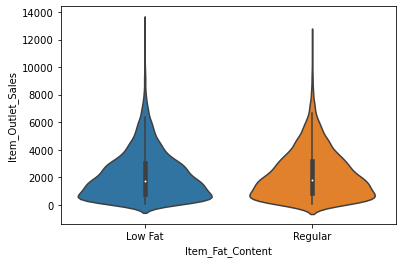

In [35]:
sns.violinplot(x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',data = data)

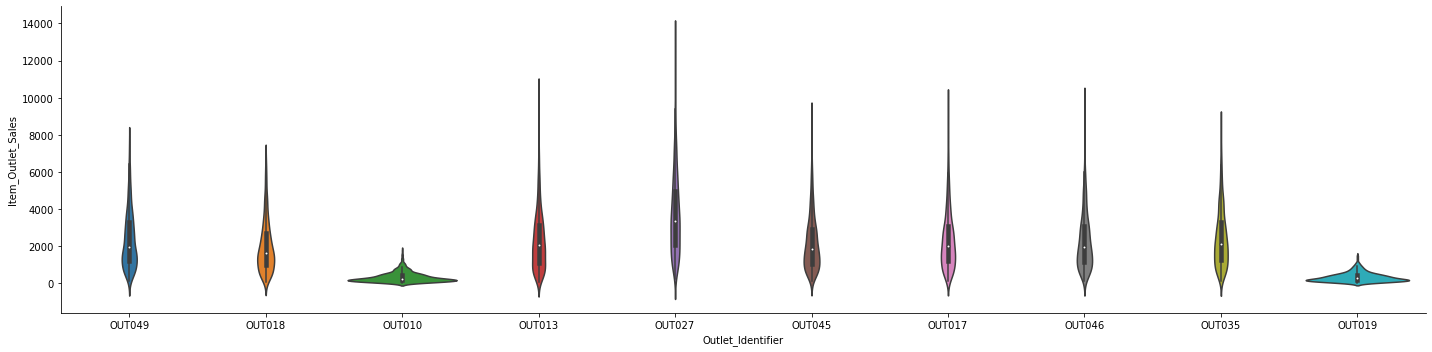

In [36]:
sns.catplot('Outlet_Identifier','Item_Outlet_Sales',kind = 'violin',data = data,aspect = 4)

#### Observations
1. Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct and same is the case with Item_Fat_Content.
2. The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier.

**These are the kind of insights that we can extract by visualizing our data. Hence, data visualization should be an important part of any kind data analysis.**